### read UND citation aircraft data and make plots

In [1]:
import matplotlib.pyplot as plt

import sys
sys.path.insert(0, "..")
import cocpit.environment.read_UND_citation as citation

%load_ext autoreload
%autoreload 2

In [2]:
params = {'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'large',
         'ytick.labelsize':'large'}
plt.rcParams.update(params)

In [3]:
filename = "ADPAA/UND_citation/MC3E/2011_04_25_09_07_51_v2.mc3e"
filename = "ADPAA/UND_citation/OLYMPEX/15_11_12_18_49_13.olympex"
filename = "/data/data/cpi_data/enironmental_data/olympex_navcit_20151112_184913.txt"
obj_file = citation.UND(filename)
obj_file.read_file()
obj_file.header()
obj_file.parse_header()
time_hms = obj_file.collect_times()
obj_file.close_file()

['Time', 'Air_Temp', 'MachNo_N', 'IAS', 'TAS', 'Press_Alt', 'Pot_Temp_T1', 'STATIC_PR', 'DEWPT', 'REL_HUM', 'MixingRatio', 'DewPoint', 'FrostPoint', 'RH', 'IceMSOFreq', 'TSG_Date', 'POS_Roll', 'POS_Pitch', 'POS_Head', 'POSZ_Acc', 'POS_Lat', 'POS_Lon', 'POS_Alt', 'POS_Spd', 'POS_Trk', 'Alpha', 'Beta', 'VERT_VEL', 'Wind_Z', 'Wind_M', 'Wind_D', 'TURB', 'King_LWC_ad', 'Nev_TWC', 'Nev_LWCcor', 'Nev_IWC', 'CSI_M_Ratio', 'CSI_CWC', 'CDP_Conc', 'CDP_LWC', 'CDP_MenD', 'CDP_VolDia', 'CDP_EffRad', '2-DC_Conc', '2-DC_MenD', '2-DC_VolDia', '2-DC_EffRad', 'Nt2DSHGT105', 'Nt2DSH_all', 'Nt2DSVGT105', 'Nt2DSV_all', 'Nt_HVPS3H', 'Nt_HVPS3BV']


In [4]:
obj_file.find_times()
print(f"start time {obj_file.start_time}")
print(f"end time {obj_file.end_time}")

start time 19:17:25
end time 22:34:34


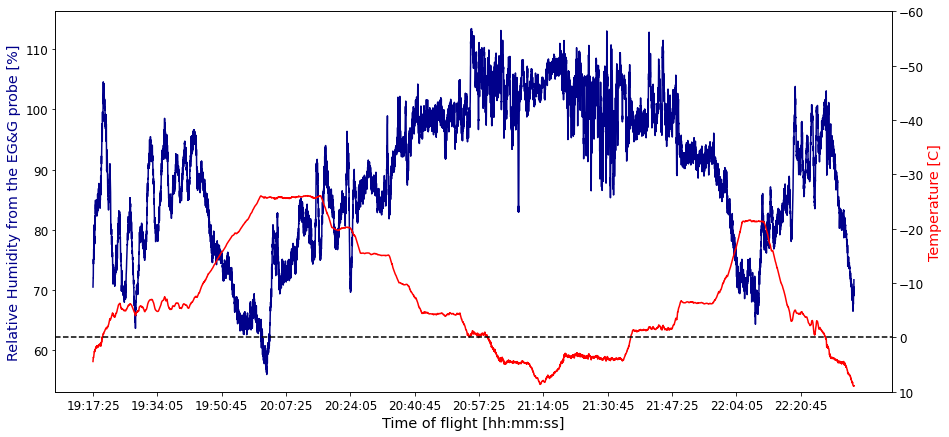

In [5]:
fig, ax1 = plt.subplots(figsize=(15,7))
ax1.plot(time_hms, obj_file.data['REL_HUM'], 'darkblue')
ax1.xaxis.set_ticks(time_hms[0::1000])
#ax1.set_ylim(0, 90200)
ax1.set_xlabel("Time of flight [hh:mm:ss]")
ax1.set_ylabel("Relative Humidity from the EG&G probe [%]", c='darkblue')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.plot(time_hms, obj_file.data['Air_Temp'], 'r')
ax2.xaxis.set_ticks(time_hms[0::1000])
ax2.set_ylabel('Temperature [C]', color='r')
ax2.set_ylim(10, -60)
ax2.axhline(y=0, color='k', linestyle='--')
plt.show()

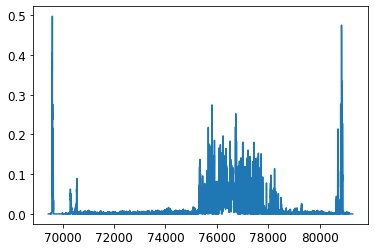

In [6]:
plt.plot(obj_file.data['Time'], obj_file.data['CDP_LWC'])

In [ ]:
plt.plot(obj_file.data['Time'], obj_file.data['2-DC_EffRad']) #microns

In [15]:
print(obj_file.VNAME)

['Air Temperature Corrected for Dynamic Heating (Based first on the main temperatue/pitot instrument and secondarly based on the backup temperature/pitot instrument) [degC]', 'Mach Number (Based first on the main temperatue/pitot instrument and secondarly based on the backup temperature/pitot instrument)', 'Indicated Air Speed (Based first on the main pitot instrument and secondarly based on the backup pitot instrument) [m/s]', 'True Air Speed (Based first on the main temperatue/pitot instrument and secondarly based on the backup temperature/pitot instrument) [m/s]', 'Pressure Altitude [m]', 'Potential Temperature (Based first on the main temperatue/pitot instrument and secondarly based on the backup temperature/pitot instrument) [degK]', 'Static Pressure [hPa] {Calibration:  slope = 207.08000 offset = -0.71000000}', 'Dewpoint Temperature from EG&G Probe [degC] {Calibration:  slope = 20.000000 offset = -70.000000}', 'Relative Humidity from the EG&G probe [%]', 'Mixing Ratio by weight f